<a href="https://colab.research.google.com/github/Riyathapa305/BreastCancer/blob/main/BreastCancerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
import sklearn

In [ ]:
import zipfile
import os
import cv2
malign="malign.zip"
benign="benign.zip"
with zipfile.ZipFile(malign,'r') as zip_ref:
  zip_ref.extractall()
with zipfile.ZipFile(benign,'r') as zip_ref:
  zip_ref.extractall()
folder=[name for name in os.listdir() if os.path.isdir(name)]
print(' EXTRACTED Folders:')
for fold in folder:
  print(fold)

x=[]
y=[]
malignant_folder='malign'
benign_folder="benign"
malignant_images=os.listdir(malignant_folder)
for image_name in malignant_images:
  image_path=os.path.join(malignant_folder,image_name)
  image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  image=np.expand_dims(image,axis=-1)
  x.append(image)
  y.append(1)
benign_images=os.listdir(benign_folder)
for image_name in benign_images:
  image_path=os.path.join(benign_folder,image_name)
  image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  image=np.expand_dims(image,axis=-1)
  x.append(image)
  y.append(0)
x=np.array(x)
y=np.array(y)
print("Shape of x:",x.shape)
print("Shape of y:", y.shape)




 EXTRACTED Folders:
.config
malign
benign
sample_data
Shape of x: (239, 460, 700, 1)
Shape of y: (239,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2 ,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5,1.5]

)
extra_images=[]
extra_labels=[]
while len(extra_images)<1600:
  batch_images,batch_labels=next(datagen.flow(x,y,batch_size=32))
  extra_images.extend(batch_images)
  extra_labels.extend(batch_labels)

extra_images=np.array(extra_images[:1600])
extra_labels=np.array(extra_labels[:1600])




In [ ]:
x=np.concatenate((x,extra_images))
y=np.concatenate((y,extra_labels))


In [ ]:
train_data = list(zip(x, y))
np.random.shuffle(train_data)

x_train_shuffled, y_train_shuffled = zip(*train_data)

x = np.array(x_train_shuffled)
y = np.array(y_train_shuffled)

In [ ]:
from sklearn.utils import shuffle
x,y=shuffle(x,y,random_state=43)


In [ ]:
print(len(x))

1839


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
x_train=x_train/255.0
x_test=x_test/250.0

In [ ]:
x_train.shape

(1471, 460, 700, 1)

In [ ]:
x_train=tf.image.resize(x_train,(32,32))
x_test=tf.image.resize(x_test,(32,32))
print("the shape of x_train is:",x_train.shape)
print("the shape of x_test is:",x_test.shape)


the shape of x_train is: (1471, 32, 32, 1)
the shape of x_test is: (368, 32, 32, 1)


In [ ]:
# Modelling
# 1
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
# model.add(BatchNormalization())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

model.add(layers.Dense(128,activation="relu"))
# model.add(BatchNormalization())

model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(8,activation="relu"))

model.add(layers.Dense(2))




In [ ]:
from tensorflow.keras import optimizers

optimizer=optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
46/46 [==============================] - 6s 86ms/step - loss: 0.6904 - accuracy: 0.5201 - val_loss: 0.6711 - val_accuracy: 0.5245
Epoch 2/20
46/46 [==============================] - 3s 59ms/step - loss: 0.6408 - accuracy: 0.6200 - val_loss: 0.5541 - val_accuracy: 0.7337
Epoch 3/20
46/46 [==============================] - 3s 59ms/step - loss: 0.5507 - accuracy: 0.7165 - val_loss: 0.5348 - val_accuracy: 0.7120
Epoch 4/20
46/46 [==============================] - 3s 58ms/step - loss: 0.4978 - accuracy: 0.7512 - val_loss: 0.5119 - val_accuracy: 0.7446
Epoch 5/20
46/46 [==============================] - 4s 80ms/step - loss: 0.5674 - accuracy: 0.7111 - val_loss: 0.6632 - val_accuracy: 0.6495
Epoch 6/20
46/46 [==============================] - 3s 62ms/step - loss: 0.5265 - accuracy: 0.7294 - val_loss: 0.5311 - val_accuracy: 0.7391
Epoch 7/20
46/46 [==============================] - 3s 61ms/step - loss: 0.4794 - accuracy: 0.7512 - val_loss: 0.5021 - val_accuracy: 0.7418
Epoch 8/20
46

<Axes: >

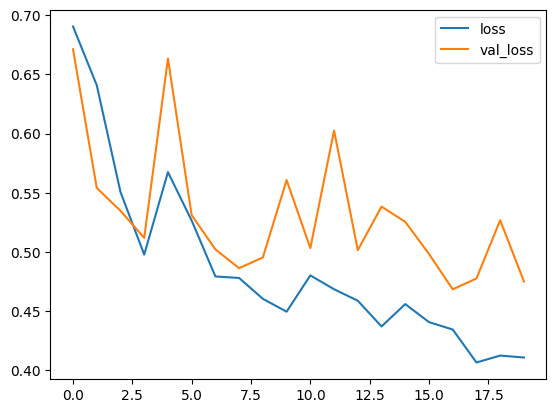

In [ ]:
import pandas as pd
model_df=pd.DataFrame(history.history)
model_df[['loss','val_loss']].plot()

<Axes: >

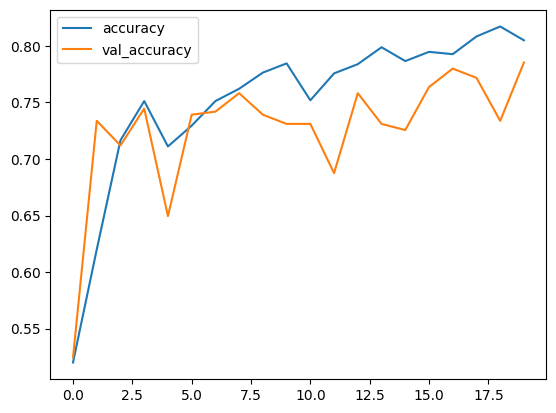

In [ ]:
import pandas as pd
model_df=pd.DataFrame(history.history)
model_df[['accuracy','val_accuracy']].plot()

In [ ]:
# Modeling 2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout,BatchNormalization

from tensorflow.keras import optimizers
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.GlobalAveragePooling2D())

# model.add(layers.Flatten())
# model.add(layers.Dense(256,activation="relu"))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(layers.Dense(506,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(4,activation="relu"))

model.add(layers.Dense(2))

In [ ]:
from tensorflow.keras import optimizers

optimizer=optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

<Axes: >

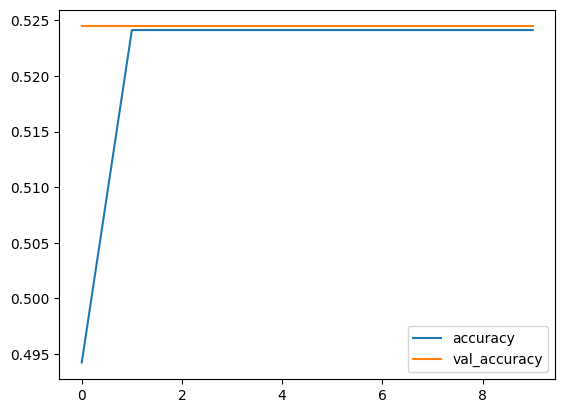

In [ ]:
import pandas as pd
model_df=pd.DataFrame(history.history)
model_df[['accuracy','val_accuracy']].plot()

In [ ]:
# Modelling 3
from tensorflow.keras.applications import ResNet50

from tensorflow.keras import layers

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model=Sequential()
model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=(32, 32, 1)))  # Convert grayscale to RGB

model.add(base_model)


# model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(2,activation="softmax"))

model.summary()






Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 32, 32, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_133 (Dense)           (None, 64)                131136    
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_134 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_18 (Bat  (None, 32)             

In [ ]:
from tensorflow.keras.utils import to_categorical



In [ ]:
from tensorflow.keras.optimizers import Adam

optimizers=Adam(learning_rate=0.01)
model.compile(optimizer=optimizers, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
y_train.shape

(1471,)

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout,BatchNormalization

base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

model = models.Sequential()
model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=(32, 32, 1)))  # Convert grayscale to RGB


model.add(base_model)
# model.add(BatchNormalization())

model.add(layers.GlobalAveragePooling2D())

# model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.3))


model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32,activation="relu"))


model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_9 (Lambda)           (None, 32, 32, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d_11  (None, 1024)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_167 (Dense)           (None, 256)               262400    
                                                                 
 batch_normalization_19 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [ ]:
y_train.shape

(377,)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hiatory=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
46/46 [==============================] - 86s 813ms/step - loss: 0.5509 - accuracy: 0.7050 - val_loss: 0.6716 - val_accuracy: 0.5815
Epoch 2/10
46/46 [==============================] - 35s 755ms/step - loss: 0.5219 - accuracy: 0.7349 - val_loss: 1.6140 - val_accuracy: 0.5109
Epoch 3/10
46/46 [==============================] - 35s 767ms/step - loss: 0.4532 - accuracy: 0.7770 - val_loss: 2.1291 - val_accuracy: 0.4891
Epoch 4/10
46/46 [==============================] - 34s 751ms/step - loss: 0.4084 - accuracy: 0.8110 - val_loss: 0.7664 - val_accuracy: 0.6875
Epoch 5/10
46/46 [==============================] - 34s 735ms/step - loss: 0.4365 - accuracy: 0.8029 - val_loss: 0.7064 - val_accuracy: 0.6848
Epoch 6/10
46/46 [==============================] - 36s 784ms/step - loss: 0.4028 - accuracy: 0.8246 - val_loss: 0.4898 - val_accuracy: 0.7935
Epoch 7/10
46/46 [==============================] - 35s 756ms/step - loss: 0.3634 - accuracy: 0.8484 - val_loss: 0.5720 - val_accuracy: 0.7446

<Axes: >

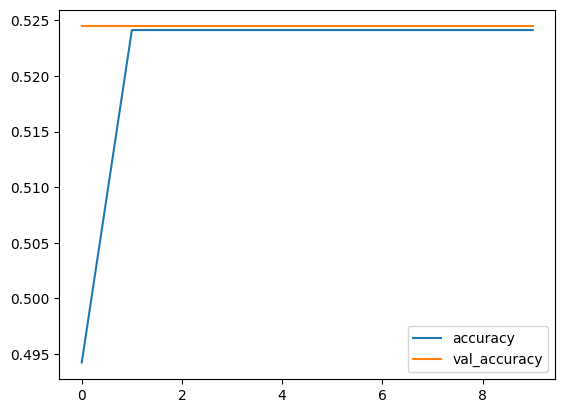

In [ ]:
import pandas as pd
model_df=pd.DataFrame(history.history)
model_df[['accuracy','val_accuracy']].plot()

<Axes: >

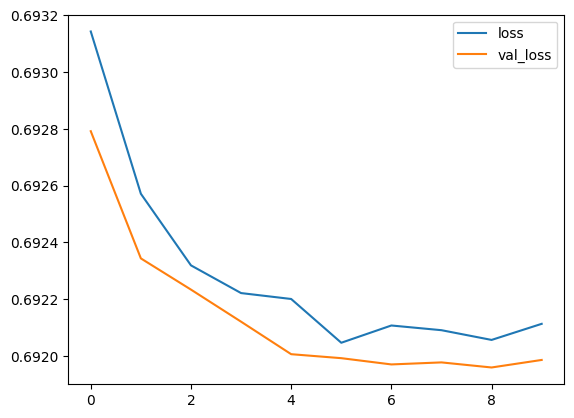

In [ ]:
import pandas as pd
model_df=pd.DataFrame(history.history)
model_df[['loss','val_loss']].plot()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=(32, 32, 1)))  # Convert grayscale to RGB


model.add(base_model)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
